In [1]:
# plot of liquity 
import matplotlib.pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'
import scipy 
import matplotlib.pyplot as plt
import matplotlib.animation
from matplotlib.widgets import Slider
import seaborn as sns
import numpy as np 
import random
import pandas as pd 
from ipywidgets import *
from scipy.stats import norm

#Import simulation function and class 
%run rbpool_env_v3.ipynb

In [2]:
path = './input/BTC-USD.csv'
btc_hist = pd.read_csv(path)
btc_hist['_date'] = btc_hist.Date.apply(pd.to_datetime)
# single_path = './Simulation_check.csv'
# _df = pd.read_csv(single_path) 
# _df.head()

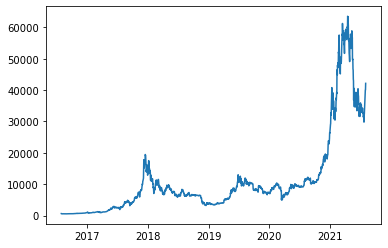

In [3]:
%matplotlib inline
plt.plot(btc_hist._date, btc_hist.Open)
plt.show()
#btc_hist.Open.plot()

In [4]:
start_date = '2021-01-01'
end_date = '2021-03-31'
_btc = btc_hist[btc_hist.Date.between(start_date, end_date)]
_btc_price = _btc.Open.values
_btc_price.shape[0]

90

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.314
Model:                            OLS   Adj. R-squared (uncentered):              0.307
Method:                 Least Squares   F-statistic:                              41.73
Date:                Sat, 07 Aug 2021   Prob (F-statistic):                    5.06e-09
Time:                        18:27:45   Log-Likelihood:                         -43.035
No. Observations:                  92   AIC:                                      88.07
Df Residuals:                      91   BIC:                                      90.59
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\jings\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Time to maturity (in year)')

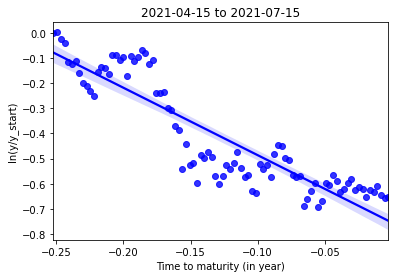

In [5]:
# check on BTC actual price growth trend and volatility 

import statsmodels.api as statm
from statsmodels.tools.eval_measures import rmse
import seaborn as sns
%matplotlib inline 

#define response variable
start_date = '2021-04-15'
end_date='2021-07-15'
market = '{}_{}'.format(start_date, end_date)
_btc = btc_hist[btc_hist.Date.between(start_date, end_date)]
y = _btc.Open.values
t = -np.linspace(y.shape[0],0,y.shape[0]+1)/365
t = t[:-1]
logy = np.log(y)
logy = logy-logy[0]
logy.shape
t.shape
###fit linear regression model
model = statm.OLS(logy, t).fit()
model.summary()
# fit your model which you have already done
# now generate predictions
logypred = model.predict(logy)
## calc rmse
rmse = rmse(logy, logypred)
print(model.summary(), rmse)
ax = sns.regplot(t,logy, color ='blue')
ax.set_title("{} to {}".format(start_date, end_date))
ax.set_ylabel("ln(y/y_start)")
ax.set_xlabel("Time to maturity (in year)")


<IPython.core.display.Javascript object>


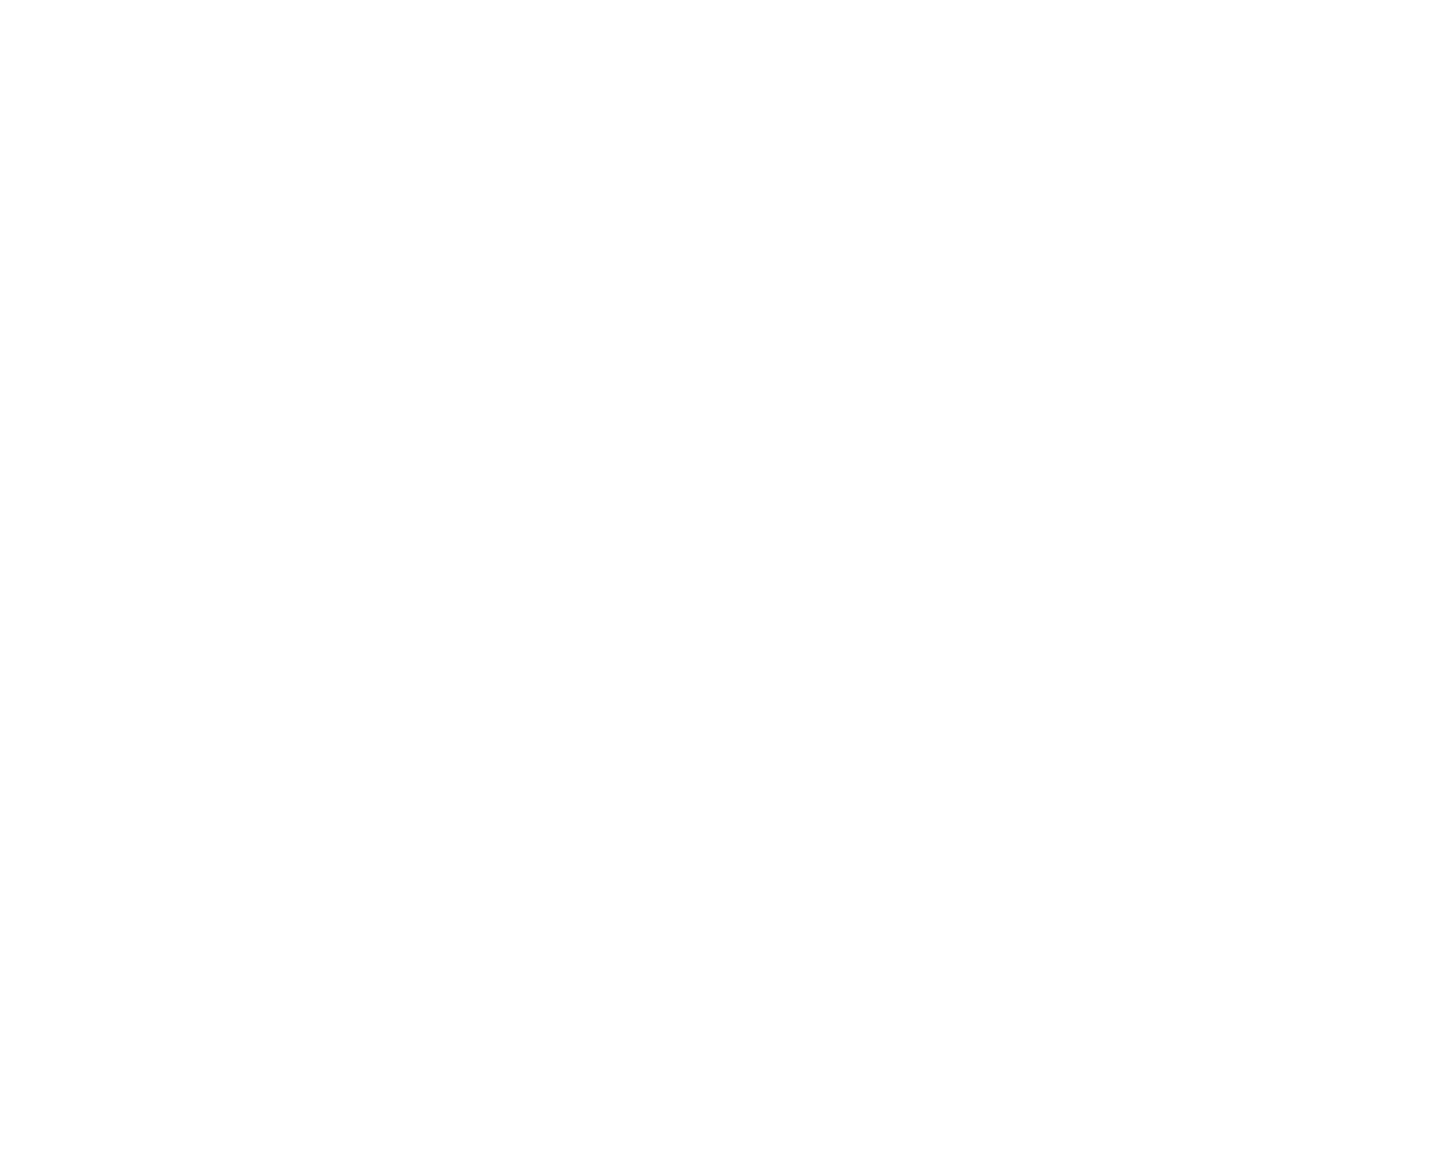

KeyError: 93

In [6]:
def dynamic_plot(start_date, end_date):
    df_plot = ltv_simulation_path(1, 'SM', 0.95)
    d = df_plot.index.values
    y = df_plot.y_price.values
    x,y =[],[]
    def animate_line(i):
        d = df_plot.index.values
        y = df_plot.y_price.values
        line.set_data(d[:i],y[:i])
        return line

    lst1 = df_plot['x_locked']
    lst2 = df_plot['y_price']*df_plot['y_locked']
    b1, b2 = [], []
    def animate_bar(i):
        lst1 = df_plot['x_locked']
        lst2 = df_plot['y_price']*df_plot['y_locked']
        y1=lst1[i]
        y2=lst2[i]
        ax2.clear() 
        ax2.set_title('Total Pool Value')
        ax2.set_xlabel('Collateral Rebalancing Pool')
        ax2.set_ylim(0,2e7)
        ax2.bar(['USD', 'BTC'], [y1, y2], color =['green', 'yellow'])

    def updateAll(i):
        a = animate_line(i)
        b = animate_bar(i)
        return a,b

    %matplotlib notebook    
    import matplotlib.animation as ani
    fig = plt.figure(figsize=(10,8))
    ax1 = fig.add_subplot(1,2,1, xlim = (0, 92), ylim=(0, 130000))
    line, = ax1.plot([],[])
    ax1.set_ylabel('USD')
    ax1.set_xlabel('Day')
    ax1.set_title('BTC Price from {} to {}'.format(start_date, end_date))
    ax2 = fig.add_subplot(1,2,2)

    ax2.set_ylim(0,2e7)
    ax2.set_title('Total Pool Value')
    ax2.set_xlabel('total pool value')
    bar = ax2.bar(['USD', 'BTC'],[0, 0], color=['green', 'yellow'])
    animator = ani.FuncAnimation(fig, updateAll, interval=100, blit=False, repeat_delay = 12000)
    fig.tight_layout()
    plt.show()
    return animator 



%matplotlib notebook    
%matplotlib notebook    
start_date = '2020-06-01'
end_date='2020-08-31'
market = '{}_{}'.format(start_date, end_date)
_btc = btc_hist[btc_hist.Date.between(start_date, end_date)]
price_source = _btc.Open.values

Real_vol = 0.75
Growth_rate = 0
LTV0 = 0.8
bs_vol = 0.75
Collateral = 10000000
pool_init_x = 5000000 
y_price_init = price_source[0]
pool_init_y = 5000000/y_price_init
pool_init_wx = 0.5
fee_rate = 0.0
rebate=0
set_random_seed = False  
t = np.linspace(price_source.shape[0],0,price_source.shape[0]+1)/365
ltv_simulation_path(1, 'SM', 0.95)
animator = dynamic_plot(start_date, end_date)
plt.show()
f = r'animation_{}_{}_rebate.gif'.format(start_date, end_date)
import matplotlib.animation as animation
writergif = animation.PillowWriter(fps=100) 
animator.save(f, writer=writergif)


In [ ]:
set_random_seed = False
s=1
for i in np.linspace(0.5,1.5, 21):
    np.random.seed(101)
    Real_vol,bs_vol  = i,i
    _sm = pd.DataFrame(ltv_simulation(s, 'SM', 0.70))
    _sm['vol'] = '{:.2f}'.format(i)
    if i == 0.5:
        SM = _sm
    else:
        SM = pd.concat([SM, _sm])

In [ ]:
%matplotlib inline

SM.columns = ['pool_value', 'pvtc', 'default', 'portfolio', 'imp_weight', 'imp_price', 'PNL_price',\
                  'total_pnl','mean_abs_wt_change','loss_at_default', 'vol']
sim_summary(SM.loc[SM.default==1], ['loss_at_default', 'vol'], plot=1).to_csv('sim_SM_loss_vol_{}_rebate.csv'.format(market))
sim_summary(SM, ['default', 'vol'], plot=2).to_csv('sim_default_vol_{}_rebate.csv'.format(market))

In [ ]:
np.append(np.arange(0.5,1.01,0.1), 0.95)

In [24]:
# np.arange(0,1.01,0.1)
# ['SM_factor_{}.csv'.format(int(i*100)) for i in np.arange(0,1.01,0.1)]

import pandas as pd
import sys
import os
file_list= ['SM_factor_{}_up.csv'.format(int(i*100)) for i in np.append(np.arange(0.5,1.01,0.1), 0.95)]
file_list1 = ['SM_factor_{}_up.csv'.format(int(i*100+0.1)) for i in np.append(np.arange(0.5,1.01,0.1), 0.95)]
#file_list1
#file_list.extend(['SM_100.csv'])

writer = pd.ExcelWriter('Simulation_by_vol_up.xlsx') # Arbitrary output name
_i =0
for csvfilename in file_list:
    df = pd.read_csv(csvfilename)
    df['factor'] =file_list1[_i].split("_")[2]
    df.to_excel(writer,sheet_name=file_list1[_i])
    _i+=1
writer.save()   

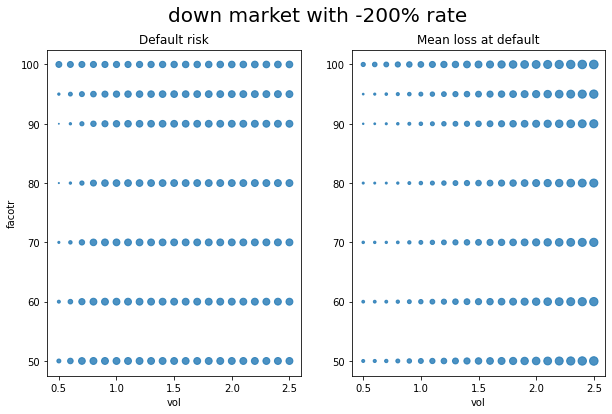

In [33]:
%matplotlib inline
from matplotlib import cm
sheet_to_df_map = pd.read_excel('./shared/Simulation_by_vol_down_neg2.xlsx', sheet_name=None)
mdf = pd.concat(sheet_to_df_map, axis=0, ignore_index=True)
factor = [int(x.split("_")[2]) for x in sheet_to_df_map.keys()]
mdf['factor'] = np.repeat(factor, 189)

mdf.head()

_df1 = mdf.loc[mdf.variable == 'default']
_df2 = mdf.loc[mdf.variable == 'loss_at_default']

fig, axs = plt.subplots(1,2,figsize=(10,6))
fig.suptitle('down market with -200% rate', fontsize=20)
axs[0].scatter(_df1['real_vol'], _df1['factor'], s = _df1['mean']*50, alpha=0.8)
# X,Y,Z = _df1['real_vol'].values, _df1['factor'].values, _df1['mean'].values
# axs[0].plot_surface(X,Y,Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
axs[0].set_title("Default risk")
axs[0].set_ylabel('facotr')
axs[0].set_xlabel('vol')
axs[1].scatter(_df2['real_vol'], _df2['factor'], s = -_df2['mean']/5e4, alpha=0.8)
axs[1].set_title("Mean loss at default")
axs[1].set_xlabel('vol')
plt.savefig('./shared/default_risk_down.png')
plt.show()

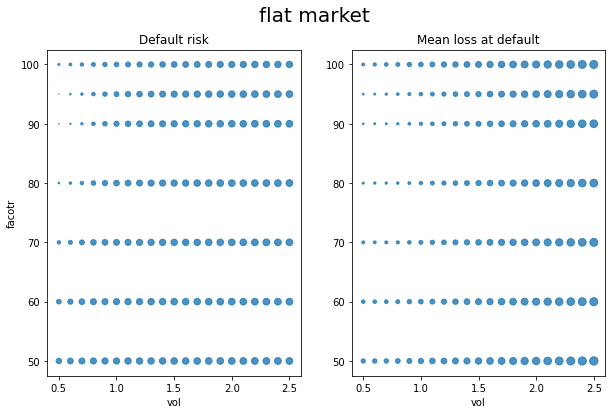

In [32]:

sheet_to_df_map = pd.read_excel('./shared/Simulation_by_vol_flat.xlsx', sheet_name=None)
mdf = pd.concat(sheet_to_df_map, axis=0, ignore_index=True)
factor = [int(x.split("_")[2]) for x in sheet_to_df_map.keys()]
mdf['factor'] = np.repeat(factor, 189)

mdf.head()

_df1 = mdf.loc[mdf.variable == 'default']
_df2 = mdf.loc[mdf.variable == 'loss_at_default']

fig, axs = plt.subplots(1,2,figsize=(10,6))
fig.suptitle('flat market ', fontsize=20)
axs[0].scatter(_df1['real_vol'], _df1['factor'], s = _df1['mean']*50, alpha=0.8)
axs[0].set_title("Default risk")
axs[0].set_ylabel('facotr')
axs[0].set_xlabel('vol')
axs[1].scatter(_df2['real_vol'], _df2['factor'], s = -_df2['mean']/5e4, alpha=0.8)
axs[1].set_title("Mean loss at default")
axs[1].set_xlabel('vol')
plt.savefig('./shared/default_risk_flat.png')
plt.show()

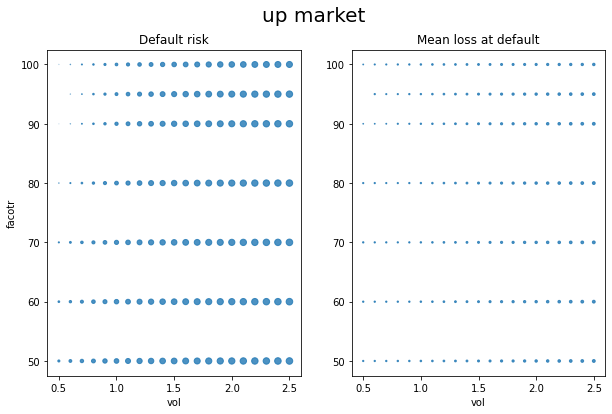

In [31]:

sheet_to_df_map = pd.read_excel('./shared/Simulation_by_vol_up.xlsx', sheet_name=None)
sheet_to_df_map

mdf = pd.concat(sheet_to_df_map, axis=0, ignore_index=True)
# mdf.shape
# factor = [int(x.split("_")[2]) for x in sheet_to_df_map.keys()]
# # mdf.shape[0]/7
# mdf['factor'] = np.repeat(factor, 230)

# mdf.head()

_df1 = mdf.loc[mdf.variable == 'default']
_df2 = mdf.loc[mdf.variable == 'loss_at_default']

fig, axs = plt.subplots(1,2,figsize=(10,6))
fig.suptitle('up market ', fontsize=20)
axs[0].scatter(_df1['real_vol'], _df1['factor'], s = _df1['mean']*50, alpha=0.8)
axs[0].set_title("Default risk")
axs[0].set_ylabel('facotr')
axs[0].set_xlabel('vol')
axs[1].scatter(_df2['real_vol'], _df2['factor'], s = -_df2['mean']/5e4, alpha=0.8)
axs[1].set_title("Mean loss at default")
axs[1].set_xlabel('vol')
plt.savefig('./shared/default_risk_up.png')
plt.show()

In [7]:
# np.arange(0,1.01,0.1)
# ['SM_factor_{}.csv'.format(int(i*100)) for i in np.arange(0,1.01,0.1)]

import pandas as pd
import sys
import os
file_list= ['SM_slope_{}.csv'.format(int(i*100)) for i in np.arange(0.7,0.99,0.05)]
file_list1= ['SM_slope_{}.csv'.format(int(i*100)) for i in np.arange(0.7,0.99,0.05)]
file_list1
# #file_list1
# #file_list.extend(['SM_100.csv'])

writer = pd.ExcelWriter('Simulation_by_slope.xlsx') # Arbitrary output name
_i =0
for csvfilename in file_list:
    df = pd.read_csv(csvfilename)
    df['factor'] =file_list1[_i].split('.')[0].split("_")[2]
    df.to_excel(writer,sheet_name='factor'+ file_list1[_i].split('.')[0].split("_")[2])
    _i+=1
writer.save()   